# Libraries

In [ ]:
#install.packages("dplyr")

In [82]:
library(dplyr)

In [ ]:
#install.packages("tidyverse")

In [83]:
library(tidyverse)

In [84]:
library(forcats)

In [ ]:
install.packages("geosphere")

In [ ]:
library(geosphere)

In [ ]:
install.packages("mice")

In [ ]:
library(mice)

In [ ]:
install.packages("caret")

In [ ]:
library(caret)

In [ ]:
install.packages("smotefamily")

In [ ]:
library(smotefamily)

In [ ]:
install.packages("naivebayes")

In [ ]:
library(naivebayes)

In [ ]:
install.packages("kernlab")

In [ ]:
library(kernlab)

# Yelp Data

## Data Import

In [85]:
data <- read.csv(file="sql_9_JSON_2018_2019_w_ac.csv", header=TRUE,sep=",",dec=";")

## Cleaning & Check

In [86]:
nrow(data)

[1] 5272

In [87]:
#Drop some columns:

data <- data %>%
    select(-name,-address,-city,-state,-business_open,-categories,-hours,)

In [88]:
str(data)

'data.frame':	5272 obs. of  40 variables:
 $ business_id               : chr  "00AGVWzkxNLGb-7ZrwAOIA" "00AGVWzkxNLGb-7ZrwAOIA" "00rIcvqmfci_oJWkOqPqmg" "00rIcvqmfci_oJWkOqPqmg" ...
 $ postal_code               : int  19139 19139 19128 19128 19118 19118 19147 19147 19146 19146 ...
 $ business_lat              : chr  "39.9532594" "39.9532594" "40.0571665" "40.0571665" ...
 $ business_long             : chr  "-75.2170205" "-75.2170205" "-75.2357367" "-75.2357367" ...
 $ overall_business_stars    : chr  "3.0" "3.0" "4.5" "4.5" ...
 $ overall_review_count      : int  70 70 92 92 61 61 101 101 65 65 ...
 $ isromantic                : chr  "False" "False" "False" "False" ...
 $ isintimate                : chr  "False" "False" "False" "False" ...
 $ istouristy                : chr  "False" "False" "False" "False" ...
 $ ishipster                 : chr  "False" "False" "False" "False" ...
 $ isdivey                   : chr  "True" "True" "False" "False" ...
 $ isclassy                  : chr  

### Recoding Attributes

In [ ]:
#Assumtion:

#If given attribute is not stated in Yelp -> count it as "NA" for respective restorant.

# NA's will be iterated via mice.

In [94]:
# Creating a function to recode attributes:

recode_column <- function(data, column_name) {
  data %>%
    mutate(!!sym(column_name) := na_if(!!sym(column_name), 'NULL')) %>%
    mutate(
      !!sym(column_name) := dplyr::recode(!!sym(column_name),
                                   "False" = "0",
                                   "True" = "1")
    )

}

In [95]:
# Creating a function to recode attributes:

recode_column2 <- function(data, column_name) {
  data %>%
    mutate(!!sym(column_name) := na_if(!!sym(column_name), 'NULL')) %>%
    mutate(!!sym(column_name) := na_if(!!sym(column_name), 'None')) %>%
    mutate(
      !!sym(column_name) := dplyr::recode(!!sym(column_name),
                                   "False" = "0",
                                   "True" = "1")
    )

}

In [96]:
# Function for labeling as factor and releveling it:
convert_and_relevel <- function(data, column_name, ref_level) {
  data[[column_name]] <- as.factor(data[[column_name]])
  data[[column_name]] <- fct_relevel(data[[column_name]], ref_level)
  return(data)
}


Ambiance Tag Attributes

In [97]:
#Check:

data %>%
    select(isromantic, isintimate, istouristy, ishipster, isdivey, isclassy, istrendy, isupscale, iscasual) %>%
      slice_head(n=8)

isromantic,isintimate,istouristy,ishipster,isdivey,isclassy,istrendy,isupscale,iscasual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
False,False,False,False,True,False,False,False,False
False,False,False,False,True,False,False,False,False
False,False,False,False,False,False,False,False,False
False,False,False,False,False,False,False,False,False
False,False,False,False,False,False,False,False,False
False,False,False,False,False,False,False,False,False
NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL


In [98]:
#Apply formula into tags
 # + change them into integer:

data <- recode_column(data, "isromantic")
data <- convert_and_relevel(data, "isromantic", "0")

data <- recode_column(data, "isintimate")
data <- convert_and_relevel(data, "isintimate", "0")

data <- recode_column(data, "istouristy")
data <- convert_and_relevel(data, "istouristy", "0")

data <- recode_column(data, "ishipster")
data <- convert_and_relevel(data, "ishipster", "0")

data <- recode_column(data, "isdivey")
data <- convert_and_relevel(data, "isdivey", "0")

data <- recode_column(data, "isclassy")
data <- convert_and_relevel(data, "isclassy", "0")

data <- recode_column(data, "istrendy")
data <- convert_and_relevel(data, "istrendy", "0")

data <- recode_column(data, "isupscale")
data <- convert_and_relevel(data, "isupscale", "0")

data <- recode_column(data, "iscasual")
data <- convert_and_relevel(data, "iscasual", "0")

In [99]:
#Check:

data %>%
    select(isromantic, isintimate, istouristy, ishipster, isdivey, isclassy, istrendy, isupscale, iscasual) %>%
      slice_head(n=8)

isromantic,isintimate,istouristy,ishipster,isdivey,isclassy,istrendy,isupscale,iscasual
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,0,0,0,1,0,0,0,0
0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA


Parking Attributes

In [100]:
#Check:

data %>%
    select(parking_garage, parking_street, parking_validated, parking_lot, parking_valet) %>%
      slice_head(n=5)

parking_garage,parking_street,parking_validated,parking_lot,parking_valet
<chr>,<chr>,<chr>,<chr>,<chr>
False,True,False,False,False
False,True,False,False,False
False,True,False,True,False
False,True,False,True,False
False,False,False,False,False


In [101]:
#Apply formula into tags
 # + change them into integer:

data <- recode_column(data, "parking_garage")
data$parking_garage <- as.integer(data$parking_garage)

data <- recode_column(data, "parking_street")
data$parking_street <- as.integer(data$parking_street)

data <- recode_column(data, "parking_validated")
data$parking_validated <- as.integer(data$parking_validated)

data <- recode_column(data, "parking_lot")
data$parking_lot <- as.integer(data$parking_lot)

data <- recode_column(data, "parking_valet")
data$parking_valet <- as.integer(data$parking_valet)

In [102]:
#Creating parking_total variable:

data <- data %>%
    mutate(parking_total = parking_garage + parking_street + parking_validated + parking_lot + parking_valet) %>%
      mutate(parking_total = if_else(parking_total == 0, 0, 1))

In [17]:
data <- convert_and_relevel(data, "parking_total", "0")

data <- convert_and_relevel(data, "parking_garage", "0")

data <- convert_and_relevel(data, "parking_street", "0")

data <- convert_and_relevel(data, "parking_validated", "0")

data <- convert_and_relevel(data, "parking_lot", "0")

data <- convert_and_relevel(data, "parking_valet", "0")

In [18]:
#Check:

data %>%
    select(parking_garage, parking_street, parking_validated, parking_lot, parking_valet, parking_total) %>%
      slice_head(n=5)

parking_garage,parking_street,parking_validated,parking_lot,parking_valet,parking_total
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,1,0,0,0,1
0,1,0,0,0,1
0,1,0,1,0,1
0,1,0,1,0,1
0,0,0,0,0,0


Alcohol

In [19]:
#Check:

unique(data$alcohol)

[1] "none'"           "full_bar'"       "NULL"            "'none'"         
[5] "'full_bar'"      "beer_and_wine'"  "'beer_and_wine'"

In [20]:
# Factor values are represented in more than two ways:
     #[none\'''full_bar\'''NULL''\'none\'''\'full_bar\'''beer_and_wine\'''\'beer_and_wine\'']:

# Check unique values before recoding
unique(data$alcohol)

# Fix the problem by replacing incorrect factors
data <- data %>%
  mutate(alcohol = recode(alcohol,
                          "none'" = "Non_alcohol",
                          "'none'" = "Non_alcohol",
                          "full_bar'" = "Full_bar",
                          "'full_bar'" = "Full_bar",
                          "beer_and_wine'" = "Beer_and_wine",
                          "'beer_and_wine'" = "Beer_and_wine"))

# Check unique values after recoding
unique(data$alcohol)

[1] "none'"           "full_bar'"       "NULL"            "'none'"         
[5] "'full_bar'"      "beer_and_wine'"  "'beer_and_wine'"

[1] "Non_alcohol"   "Full_bar"      "NULL"          "Beer_and_wine"

In [21]:
#Changing NA's into Non_alcohol, as its not stated in Yelp:

data <- data %>%
  mutate(alcohol = na_if(alcohol, 'NULL')) #%>%
      #mutate(alcohol = replace_na(alcohol, "Non_alcohol")

In [22]:
data$alcohol <- as.factor(data$alcohol)

# Redo the releveling:
data$alcohol=relevel(data$alcohol,ref="Non_alcohol")

In [23]:
unique(data$alcohol)

[1] Non_alcohol   Full_bar      <NA>          Beer_and_wine
Levels: Non_alcohol Beer_and_wine Full_bar

WIFI

In [24]:
#Check:

unique(data$wifi)

[1] "no'"    "'free'" "free'"  "NULL"   "'no'"   "paid'"  "'paid'" "None"

In [25]:
# Factor values are represented in more than two ways:
     #[none\'''full_bar\'''NULL''\'none\'''\'full_bar\'''beer_and_wine\'''\'beer_and_wine\'']:

# Check unique values before recoding
unique(data$wifi)

# Fix the problem by replacing incorrect factors
data <- data %>%
  mutate(wifi = recode(wifi,
                          'no\'' = "No",
                          '\'no\'' = "No",
                          'None' = "No",
                          '\'free\'' = "Free",
                          'free\'' = "Free",
                          'paid\'' = "Paid",
                          '\'paid\'' = "Paid"))

# Check unique values after recoding
unique(data$wifi)

[1] "no'"    "'free'" "free'"  "NULL"   "'no'"   "paid'"  "'paid'" "None"

[1] "No"   "Free" "NULL" "Paid"

In [26]:
#Changing NULL's into NA, as its not stated in Yelp:

data <- data %>%
  mutate(wifi = na_if(wifi, 'NULL'))

In [27]:
data$wifi <- as.factor(data$wifi)

# Redo the releveling:
data$wifi=relevel(data$wifi,ref="No")

In [28]:
unique(data$wifi)

[1] No   Free <NA> Paid
Levels: No Free Paid

Restaurant Price Range

In [29]:
#Adjustment for data$restaurantspricerange2:

# NA values are represented in two ways: 'NULL' and 'None':

unique(data$restaurantspricerange2)

# To fix problem: Replace

data <- data %>%
  mutate(restaurantspricerange2 = na_if(restaurantspricerange2, 'NULL')) %>%
  mutate(restaurantspricerange2 = na_if(restaurantspricerange2, 'None'))

unique(data$restaurantspricerange2)

[1] "1"    "2"    "NULL" "3"    "4"    "None"

[1] "1" "2" NA  "3" "4"

In [30]:
data$restaurantspricerange2 <- as.integer(data$restaurantspricerange2)

Rest Attributes

In [31]:
#Check:

unique(data$outdoorseating)

unique(data$restaurantstableservice)

unique(data$bikeparking)

unique(data$happyhour)

unique(data$byob)

unique(data$businessacceptscreditcards)

unique(data$restaurantscounterservice)

unique(data$hastv)

unique(data$restaurantsreservations)

unique(data$restaurantsdelivery)

unique(data$restaurantstakeout)

[1] "False" "True"  "None"  "NULL"

[1] "NULL"  "False" "True"

[1] "True"  "False" "NULL"  "None"

[1] "NULL"  "False" "True"

[1] "NULL"  "False" "True"

[1] "False" "True"  "NULL"

[1] "NULL" "True"

[1] "True"  "False" "NULL"

[1] "False" "True"  "NULL"  "None"

[1] "True"  "False" "NULL"  "None"

[1] "True"  "False" "NULL"  "None"

In [32]:
#Apply formula into tags
 # + change them into integer:

data <- recode_column2(data, "outdoorseating")
data <- convert_and_relevel(data, "outdoorseating", "0")

data <- recode_column(data, "restaurantstableservice")
data <- convert_and_relevel(data, "restaurantstableservice", "0")

data <- recode_column2(data, "bikeparking")
data <- convert_and_relevel(data, "bikeparking", "0")

data <- recode_column(data, "happyhour")
data <- convert_and_relevel(data, "happyhour", "0")

data <- recode_column(data, "byob")
data <- convert_and_relevel(data, "byob", "0")

data <- recode_column(data, "businessacceptscreditcards")
data <- convert_and_relevel(data, "businessacceptscreditcards", "0")

data <- recode_column(data, "restaurantscounterservice")
data <- convert_and_relevel(data, "restaurantscounterservice", "0")

data <- recode_column(data, "hastv")
data <- convert_and_relevel(data, "hastv", "0")

data <- recode_column2(data, "restaurantsreservations")
data <- convert_and_relevel(data, "restaurantsreservations", "0")

data <- recode_column2(data, "restaurantsdelivery")
data <- convert_and_relevel(data, "restaurantsdelivery", "0")

data <- recode_column2(data, "restaurantstakeout")
data <- convert_and_relevel(data, "restaurantstakeout", "0")

Warning message:
“1 unknown level in `f`: 0”


### Recoding Variables

In [33]:
str(data)

'data.frame':	5272 obs. of  41 variables:
 $ business_id               : chr  "00AGVWzkxNLGb-7ZrwAOIA" "00AGVWzkxNLGb-7ZrwAOIA" "00rIcvqmfci_oJWkOqPqmg" "00rIcvqmfci_oJWkOqPqmg" ...
 $ postal_code               : int  19139 19139 19128 19128 19118 19118 19147 19147 19146 19146 ...
 $ business_lat              : chr  "39.9532594" "39.9532594" "40.0571665" "40.0571665" ...
 $ business_long             : chr  "-75.2170205" "-75.2170205" "-75.2357367" "-75.2357367" ...
 $ overall_business_stars    : chr  "3.0" "3.0" "4.5" "4.5" ...
 $ overall_review_count      : int  70 70 92 92 61 61 101 101 65 65 ...
 $ isromantic                : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 NA NA 1 1 ...
 $ isintimate                : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 NA NA 1 1 ...
 $ istouristy                : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 NA NA 1 1 ...
 $ ishipster                 : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 NA NA 1 1 ...
 $ isdivey                   : Factor w/ 2 levels "0",

In [34]:
data$business_id  <- as.character(data$business_id)

data$postal_code  <- as.integer(data$postal_code)

data$business_lat <- as.numeric(data$business_lat)

data$business_long <- as.numeric(data$business_long)

data$overall_business_stars <- as.numeric(data$overall_business_stars)

data$overall_review_count <- as.integer(data$overall_review_count)

data$n_photo <- as.integer(data$n_photo)

data$year <- as.integer(data$year)

data$attribute_count <- as.integer(data$attribute_count)

data$check_in_count <- as.integer(data$check_in_count)

data$review_count <- as.integer(data$review_count)

data$average_stars <- as.numeric(data$average_stars)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [35]:
summary(data)

 business_id         postal_code     business_lat   business_long   
 Length:5272        Min.   :19101   Min.   :39.87   Min.   :-75.33  
 Class :character   1st Qu.:19106   1st Qu.:39.95   1st Qu.:-75.18  
 Mode  :character   Median :19123   Median :39.95   Median :-75.16  
                    Mean   :19124   Mean   :39.97   Mean   :-75.15  
                    3rd Qu.:19145   3rd Qu.:39.99   3rd Qu.:-75.14  
                    Max.   :19195   Max.   :40.13   Max.   :-74.96  
                                                                    
 overall_business_stars overall_review_count isromantic  isintimate 
 Min.   :1.00           Min.   :   5.0       0   :4320   0   :4142  
 1st Qu.:3.50           1st Qu.:  38.0       1   : 118   1   : 170  
 Median :4.00           Median :  98.0       NA's: 834   NA's: 960  
 Mean   :3.65           Mean   : 202.3                              
 3rd Qu.:4.00           3rd Qu.: 235.2                              
 Max.   :5.00           Max.   :57

In [36]:
sum(is.na(data$restaurantspricerange2))

[1] 334

Dealing with NA's in attribute_count

In [37]:
sum(is.na(data$attribute_count))

data$attribute_count  <- as.character(data$attribute_count)

data <- data %>%
    mutate(attribute_count = replace_na(attribute_count, "0"))

data$attribute_count <- as.integer(data$attribute_count)

sum(is.na(data$attribute_count))

[1] 2

[1] 0

# External: Population Data

## Data Import

In [38]:
population_by_zip_2018_raw <- read.csv(file="ACSDP5Y2018.DP05-2024-06-27T181422.csv", header=TRUE,sep=",",dec=";")

In [39]:
population_by_zip_2019_raw <- read.csv(file="ACSDP5Y2019.DP05-2024-06-27T182513.csv", header=TRUE,sep=",",dec=";")

## Cleaning & Check

### 2018 Data

In [40]:
head(population_by_zip_2018_raw)

,Label..Grouping.,SEX.AND.AGE..Total.population,SEX.AND.AGE..Total.population..Male,SEX.AND.AGE..Total.population..Female,SEX.AND.AGE..Total.population..Sex.ratio..males.per.100.females.,SEX.AND.AGE..Total.population..Under.5.years,SEX.AND.AGE..Total.population..5.to.9.years,SEX.AND.AGE..Total.population..10.to.14.years,SEX.AND.AGE..Total.population..15.to.19.years,SEX.AND.AGE..Total.population..20.to.24.years,SEX.AND.AGE..Total.population..25.to.34.years,SEX.AND.AGE..Total.population..35.to.44.years,SEX.AND.AGE..Total.population..45.to.54.years,SEX.AND.AGE..Total.population..55.to.59.years,SEX.AND.AGE..Total.population..60.to.64.years,SEX.AND.AGE..Total.population..65.to.74.years,SEX.AND.AGE..Total.population..75.to.84.years,SEX.AND.AGE..Total.population..85.years.and.over,Total.housing.units
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ZCTA5 19102,,,,,,,,,,,,,,,,,,
2,Estimate,"4,937","2,505","2,432",103.0,85,16,15,230,596,"1,936",422,477,64,189,491,260,156,"3,536"
3,Percent,"4,937",50.7%,49.3%,(X),1.7%,0.3%,0.3%,4.7%,12.1%,39.2%,8.5%,9.7%,1.3%,3.8%,9.9%,5.3%,3.2%,(X)
4,ZCTA5 19103,,,,,,,,,,,,,,,,,,
5,Estimate,"24,219","10,699","13,520",79.1,681,341,268,368,"1,558","8,544","2,823","2,242","1,004","1,159","2,974","1,473",784,"17,328"
6,Percent,"24,219",44.2%,55.8%,(X),2.8%,1.4%,1.1%,1.5%,6.4%,35.3%,11.7%,9.3%,4.1%,4.8%,12.3%,6.1%,3.2%,(X)


In [41]:
#Data Cleaning for 2018 Data:

# Identify rows that are estimates
estimates_2018 <- population_by_zip_2018_raw %>%
  filter(grepl("Estimate", population_by_zip_2018_raw$Label..Grouping.))

# Extract labels
labels_2018 <- population_by_zip_2018_raw %>%
  filter(!grepl("Estimate|Percent", population_by_zip_2018_raw$Label..Grouping.))

# Combine labels and estimates
population_by_zip_2018 <- labels_2018 %>%
  mutate(row_number = row_number()) %>%
  select(Label..Grouping.,row_number) %>%
  left_join(estimates_2018 %>%
              select(-Label..Grouping.) %>%
              mutate(row_number = row_number()),
            by = "row_number") %>%
  select(-row_number)  %>%
  separate(Label..Grouping., into = c("ZCTA5", "postal_code"), sep = " ") %>%
  select(-ZCTA5) %>%
  rename_with(~ gsub("^SEX.AND.AGE..", "", .)) %>%
  mutate_all(~ gsub(",", "", .)) %>%
  #mutate_all(~ gsub(".", "", .)) %>%
  select(-Total.population..Sex.ratio..males.per.100.females.)

#Adjust column type:
population_by_zip_2018 <- population_by_zip_2018 %>%
  mutate(across(-1, as.numeric)) %>%  # Convert all columns except the first to numeric
  mutate(across(1, as.integer))

#Adjusting for final structure:
population_by_zip_2018 <- population_by_zip_2018 %>%
  mutate(males_per_females = Total.population..Male / Total.population..Female) %>%
  mutate(males_per_females = replace_na(males_per_females, 0)) %>% # Replace NA with zero in males_per_females
  select(-Total.population..Male, -Total.population..Female) %>%
  rename(total_population = Total.population) %>%
  mutate(total_population_children = Total.population..Under.5.years + Total.population..5.to.9.years + Total.population..10.to.14.years,
          total_population_youth = Total.population..15.to.19.years	+ Total.population..20.to.24.years,
            total_population_adults = Total.population..25.to.34.years + Total.population..35.to.44.years + Total.population..45.to.54.years
                                        + Total.population..55.to.59.years + Total.population..60.to.64.years,
              total_population_seniors = Total.population..65.to.74.years + Total.population..75.to.84.years + Total.population..85.years.and.over) %>%
  select(postal_code, males_per_females, total_population, total_population_children, total_population_youth, total_population_adults, total_population_seniors)

In [42]:
head(population_by_zip_2018)

,postal_code,males_per_females,total_population,total_population_children,total_population_youth,total_population_adults,total_population_seniors
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19102,1.0300164,4937,116,826,3088,907
2,19103,0.7913462,24219,1290,1926,15772,5231
3,19104,0.9367043,54311,6698,23800,20000,3813
4,19106,1.0676692,12375,763,761,8671,2180
5,19107,0.9222456,13696,727,2157,9297,1515
6,19109,0.0000000,0,0,0,0,0


### 2019 Data

In [43]:
head(population_by_zip_2019_raw)

,Label..Grouping.,SEX.AND.AGE..Total.population,SEX.AND.AGE..Total.population..Male,SEX.AND.AGE..Total.population..Female,SEX.AND.AGE..Total.population..Sex.ratio..males.per.100.females.,SEX.AND.AGE..Total.population..Under.5.years,SEX.AND.AGE..Total.population..5.to.9.years,SEX.AND.AGE..Total.population..10.to.14.years,SEX.AND.AGE..Total.population..15.to.19.years,SEX.AND.AGE..Total.population..20.to.24.years,SEX.AND.AGE..Total.population..25.to.34.years,SEX.AND.AGE..Total.population..35.to.44.years,SEX.AND.AGE..Total.population..45.to.54.years,SEX.AND.AGE..Total.population..55.to.59.years,SEX.AND.AGE..Total.population..60.to.64.years,SEX.AND.AGE..Total.population..65.to.74.years,SEX.AND.AGE..Total.population..75.to.84.years,SEX.AND.AGE..Total.population..85.years.and.over,SEX.AND.AGE..Total.population..Median.age..years.,Total.housing.units
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ZCTA5 19102,,,,,,,,,,,,,,,,,,,
2,Estimate,"5,147","2,679","2,468",108.5,145,18,0,244,605,"2,054",624,277,118,176,477,281,128,31.6,"3,619"
3,Percent,"5,147",52.0%,48.0%,(X),2.8%,0.3%,0.0%,4.7%,11.8%,39.9%,12.1%,5.4%,2.3%,3.4%,9.3%,5.5%,2.5%,(X),(X)
4,ZCTA5 19103,,,,,,,,,,,,,,,,,,,
5,Estimate,"24,214","10,491","13,723",76.4,645,312,289,351,"1,508","8,629","2,673","2,178","1,217","1,106","2,893","1,615",798,36.2,"17,613"
6,Percent,"24,214",43.3%,56.7%,(X),2.7%,1.3%,1.2%,1.4%,6.2%,35.6%,11.0%,9.0%,5.0%,4.6%,11.9%,6.7%,3.3%,(X),(X)


In [44]:
#Data Cleaning for 2018 Data:

# Identify rows that are estimates
estimates_2019 <- population_by_zip_2019_raw %>%
  filter(grepl("Estimate", population_by_zip_2019_raw$Label..Grouping.))

# Extract labels
labels_2019 <- population_by_zip_2019_raw %>%
  filter(!grepl("Estimate|Percent", population_by_zip_2019_raw$Label..Grouping.))

# Combine labels and estimates
population_by_zip_2019 <- labels_2019 %>%
  mutate(row_number = row_number()) %>%
  select(Label..Grouping.,row_number) %>%
  left_join(estimates_2019 %>%
              select(-Label..Grouping.) %>%
              mutate(row_number = row_number()),
            by = "row_number") %>%
  select(-row_number)  %>%
  separate(Label..Grouping., into = c("ZCTA5", "postal_code"), sep = " ") %>%
  select(-ZCTA5) %>%
  rename_with(~ gsub("^SEX.AND.AGE..", "", .)) %>%
  mutate_all(~ gsub(",", "", .)) %>%
  #mutate_all(~ gsub(".", "", .)) %>%
  select(-Total.population..Sex.ratio..males.per.100.females., - Total.population..Median.age..years.)

#Adjust column type:
population_by_zip_2019 <- population_by_zip_2019 %>%
  mutate(across(-1, as.numeric)) %>%  # Convert all columns except the first to numeric
  mutate(across(1, as.integer))

#Adjusting for final structure:
population_by_zip_2019 <- population_by_zip_2019 %>%
  mutate(males_per_females = Total.population..Male / Total.population..Female) %>%
  mutate(males_per_females = replace_na(males_per_females, 0)) %>% # Replace NA with zero in males_per_females
  select(-Total.population..Male, -Total.population..Female) %>%
  rename(total_population = Total.population) %>%
  mutate(total_population_children = Total.population..Under.5.years + Total.population..5.to.9.years + Total.population..10.to.14.years,
          total_population_youth = Total.population..15.to.19.years	+ Total.population..20.to.24.years,
            total_population_adults = Total.population..25.to.34.years + Total.population..35.to.44.years + Total.population..45.to.54.years
                                        + Total.population..55.to.59.years + Total.population..60.to.64.years,
              total_population_seniors = Total.population..65.to.74.years + Total.population..75.to.84.years + Total.population..85.years.and.over) %>%
  select(postal_code, males_per_females, total_population, total_population_children, total_population_youth, total_population_adults, total_population_seniors)

In [45]:
head(population_by_zip_2019)

,postal_code,males_per_females,total_population,total_population_children,total_population_youth,total_population_adults,total_population_seniors
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19102,1.0854943,5147,163,849,3249,886
2,19103,0.7644830,24214,1246,1859,15803,5306
3,19104,0.9511840,53560,6454,23654,19313,4139
4,19106,0.9804970,12592,776,657,8853,2306
5,19107,0.9484909,14526,940,2183,9845,1558
6,19109,0.0000000,0,0,0,0,0


## Left Join into Dataset

In [46]:
nrow(data)

[1] 5272

In [47]:
#Creating df's for different years for assigning right population data to respective year:

data_2018 <- data %>%
  filter(year == 2018)

data_2019 <- data %>%
  filter(year == 2019)

# Left Join into Yelp Data:

data_2018 <- data_2018 %>%
            left_join(population_by_zip_2018, by="postal_code")

data_2019 <- data_2019 %>%
            left_join(population_by_zip_2019, by="postal_code")

# Combining two df:

data <- bind_rows(data_2018, data_2019)

data <- data %>%
  arrange(business_id, year)

In [48]:
nrow(data)

[1] 5272

# Calculation: Nearby Businesses


## Pairwise Distance Calculation

In [ ]:
#install.packages("geosphere")

In [49]:
library(geosphere)

In [50]:
# Selecting columns for distance matrix calculation:

data_1 <- data %>%
  select(business_id, business_lat, business_long)

In [51]:
# Calculate pairwise distances for all businesses:
df_distances <- data_1 %>%
  mutate(distances = apply(data_1[, c("business_long", "business_lat")], 1, function(x) distHaversine(data_1[, c("business_long", "business_lat")], x))) %>%
    select(business_id, distances)

In [52]:
# Seting a threshold distance (in meters)
threshold_distance <- 1000

# Filtering distances to find nearby businesses
nearby_counts <- df_distances %>%
  mutate(nearby_count = rowSums(distances <= threshold_distance), nearby_count_minus_1 = nearby_count - 1) %>% #adjusting for each business counting itself (subtracting 1 from each count)
    select(business_id, nearby_count_minus_1)

# Results
head(nearby_counts)

,business_id,nearby_count_minus_1
,<chr>,<dbl>
1,-0TffRSXXIlBYVbb5AwfTg,1223
2,-0TffRSXXIlBYVbb5AwfTg,1223
3,-0eUa8TsXFFy0FCxHYmrjg,239
4,-0eUa8TsXFFy0FCxHYmrjg,239
5,-1B9pP_CrRBJYPICE5WbRA,1219
6,-1B9pP_CrRBJYPICE5WbRA,1219


## Left Join into Dataset

In [53]:
#Filtering for unique/distinct values before left-join:

nearby_counts <- nearby_counts %>%
    distinct(business_id, nearby_count_minus_1)

In [54]:
#For nearby_counts, i.e. business_proximity

data <- data %>%
            left_join(nearby_counts, by="business_id")

In [55]:
head(data)

,business_id,postal_code,business_lat,business_long,overall_business_stars,overall_review_count,isromantic,isintimate,istouristy,ishipster,⋯,review_count,average_stars,parking_total,males_per_females,total_population,total_population_children,total_population_youth,total_population_adults,total_population_seniors,nearby_count_minus_1
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0TffRSXXIlBYVbb5AwfTg,19107,39.94851,-75.16197,4.5,1097,0,0,0,0,⋯,147,4.3265,1,0.9222456,13696,727,2157,9297,1515,1223
2,-0TffRSXXIlBYVbb5AwfTg,19107,39.94851,-75.16197,4.5,1097,0,0,0,0,⋯,141,4.5461,1,0.9484909,14526,940,2183,9845,1558,1223
3,-0eUa8TsXFFy0FCxHYmrjg,19104,39.95245,-75.18732,4.0,26,0,0,0,0,⋯,3,4.0000,1,0.9367043,54311,6698,23800,20000,3813,239
4,-0eUa8TsXFFy0FCxHYmrjg,19104,39.95245,-75.18732,4.0,26,0,0,0,0,⋯,9,4.1111,1,0.9511840,53560,6454,23654,19313,4139,239
5,-1B9pP_CrRBJYPICE5WbRA,19107,39.95035,-75.16158,4.0,822,0,0,0,0,⋯,98,3.8776,1,0.9222456,13696,727,2157,9297,1515,1219
6,-1B9pP_CrRBJYPICE5WbRA,19107,39.95035,-75.16158,4.0,822,0,0,0,0,⋯,67,3.9104,1,0.9484909,14526,940,2183,9845,1558,1219


In [56]:
summary(data)

 business_id         postal_code     business_lat   business_long   
 Length:5272        Min.   :19101   Min.   :39.87   Min.   :-75.33  
 Class :character   1st Qu.:19106   1st Qu.:39.95   1st Qu.:-75.18  
 Mode  :character   Median :19123   Median :39.95   Median :-75.16  
                    Mean   :19124   Mean   :39.97   Mean   :-75.15  
                    3rd Qu.:19145   3rd Qu.:39.99   3rd Qu.:-75.14  
                    Max.   :19195   Max.   :40.13   Max.   :-74.96  
                                                                    
 overall_business_stars overall_review_count isromantic  isintimate 
 Min.   :1.00           Min.   :   5.0       0   :4320   0   :4142  
 1st Qu.:3.50           1st Qu.:  38.0       1   : 118   1   : 170  
 Median :4.00           Median :  98.0       NA's: 834   NA's: 960  
 Mean   :3.65           Mean   : 202.3                              
 3rd Qu.:4.00           3rd Qu.: 235.2                              
 Max.   :5.00           Max.   :57

#TEST

In [ ]:
# Load the data
yelp_internal_data <- data
# Function to calculate Haversine distance
haversine_distance <- function(lat1, lon1, lat2, lon2) {
  dist <- distHaversine(c(lon1, lat1), c(lon2, lat2))
  return(dist / 1000)  # Convert meters to kilometers
}

# Function to calculate category overlap
calculate_overlap <- function(categories_i, categories_j) {
  cat_i <- unlist(strsplit(categories_i, ",\\s*"))
  cat_j <- unlist(strsplit(categories_j, ",\\s*"))
  common_categories <- length(intersect(cat_i, cat_j))
  total_categories_i <- length(cat_i)
  overlap <- common_categories / total_categories_i
  return(overlap)
}

# Initialize a dataframe to store the results
all_business_proximity_scores <- data.frame()

# Iterate through each postal code to calculate pairwise distances and overlaps
for (postal_code in unique(yelp_internal_data$postal_code)) {
  data_subset <- yelp_internal_data %>%
    filter(postal_code == postal_code) %>%
    mutate(pair_id = row_number())

  pairwise_distances <- data_subset %>%
    inner_join(data_subset, by = "postal_code", suffix = c("_i", "_j")) %>%
    filter(pair_id_i < pair_id_j) %>%
    mutate(
      distance = mapply(
        function(lat1, lon1, lat2, lon2) {
          tryCatch({
            haversine_distance(lat1, lon1, lat2, lon2)
          }, error = function(e) {
            NA
          })
        }, business_lat_i, business_long_i, business_lat_j, business_long_j),
      overlap = mapply(calculate_overlap, categories_i, categories_j),
      business_proximity = overlap / distance
    ) %>%
    filter(distance > 0)

  business_proximity_scores <- pairwise_distances %>%
    group_by(business_id_i) %>%
    summarise(business_proximity_score = sum(business_proximity, na.rm = TRUE))

  all_business_proximity_scores <- bind_rows(all_business_proximity_scores, business_proximity_scores)
}

# Calculate the 99th percentile of business proximity scores
percentile_99th <- quantile(all_business_proximity_scores$business_proximity_score, 0.99)

# Cap the business proximity scores at the 99th percentile
all_business_proximity_scores <- all_business_proximity_scores %>%
  mutate(capped_business_proximity = pmin(business_proximity_score, percentile_99th))

# Function to apply robust scaling
robust_scaler <- function(x) {
  median_x <- median(x)
  iqr_x <- IQR(x)
  if (iqr_x == 0) return(rep(0, length(x)))  # Handle IQR of zero
  scaled_x <- (x - median_x) / iqr_x
  return(scaled_x)
}

# Apply robust scaling to the capped business proximity scores
all_business_proximity_scores <- all_business_proximity_scores %>%
  mutate(scaled_capped_business_proximity = robust_scaler(capped_business_proximity))

Warning message in inner_join(., data_subset, by = "postal_code", suffix = c("_i", :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
Warning message in inner_join(., data_subset, by = "postal_code", suffix = c("_i", :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
Warning message in inner_join(., data_subset, by = "postal_code", suffix = c("_i", :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expect

# Base Model

## Creating a Subset

In [ ]:
install.packages("mice")

In [ ]:
library(mice)

In [58]:
# Selecting and creating the variables for the analysis:
data_to_analysis <- data %>%
    select(check_in_count, average_stars, nearby_count_minus_1, attribute_count, restaurantspricerange2, happyhour,
                    total_population, total_population_children, total_population_youth, total_population_adults, total_population_seniors) %>% # Adding external population data variables)
      mutate(children_ratio = total_population_children/total_population,
          youth_ratio = total_population_youth/total_population,
            adult_ratio = total_population_adults/total_population,
              senior_ratio = total_population_seniors/total_population) %>%
                    select(check_in_count, average_stars, nearby_count_minus_1, attribute_count, restaurantspricerange2, happyhour,
                              total_population, children_ratio, youth_ratio, adult_ratio)


## Pattern of Missings

,check_in_count,average_stars,nearby_count_minus_1,attribute_count,total_population,children_ratio,youth_ratio,adult_ratio,restaurantspricerange2,happyhour,
1870,1,1,1,1,1,1,1,1,1,1,0
3046,1,1,1,1,1,1,1,1,1,0,1
96,1,1,1,1,1,1,1,1,0,1,1
236,1,1,1,1,1,1,1,1,0,0,2
4,1,1,1,1,1,0,0,0,1,1,3
6,1,1,1,1,1,0,0,0,1,0,4
12,1,1,1,1,0,0,0,0,1,0,5
2,1,1,1,1,0,0,0,0,0,1,5
,0,0,0,0,14,24,24,24,334,3300,3720


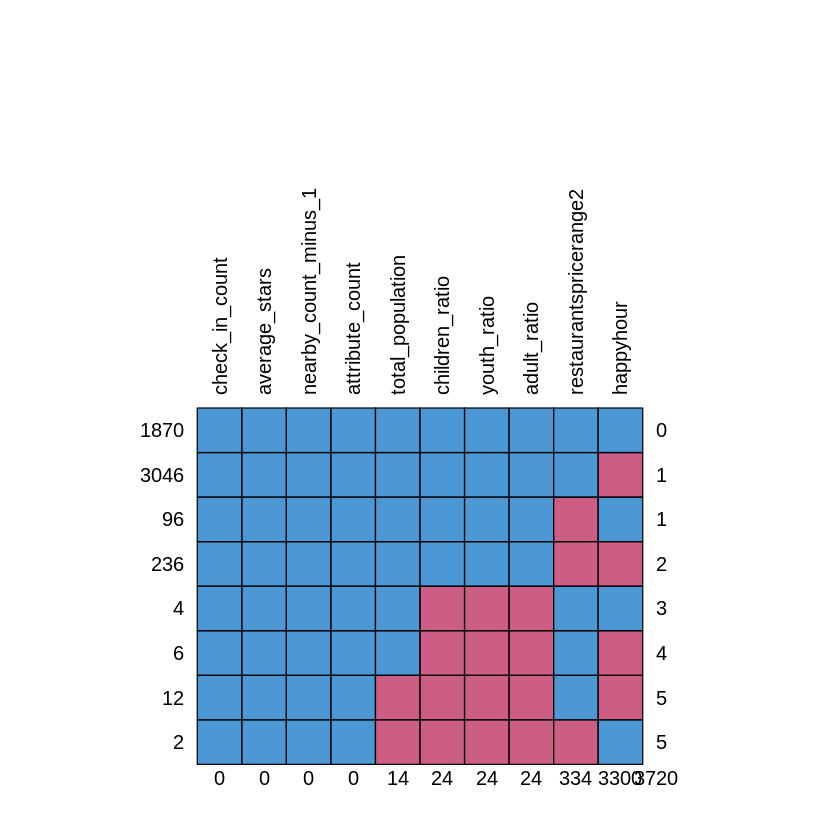

In [59]:
#inspect pattern of missings
md.pattern(data_to_analysis, plot = TRUE, rotate.names = TRUE)

## Impute Data via Mice

In [ ]:
 ## m = num. of imputations
      # Rule of thum = at least as many imputations as percentage of missing vallues
 ## maxit = max num. of iterations

In [60]:
### Impute Data via mice
MiceImputedData <- mice(data_to_analysis, m=20, maxit = 50, seed = 5431, print=FALSE)

In [61]:
summary(MiceImputedData)

Class: mids
Number of multiple imputations:  20 
Imputation methods:
        check_in_count          average_stars   nearby_count_minus_1 
                    ""                     ""                     "" 
       attribute_count restaurantspricerange2              happyhour 
                    ""                  "pmm"               "logreg" 
      total_population         children_ratio            youth_ratio 
                 "pmm"                  "pmm"                  "pmm" 
           adult_ratio 
                 "pmm" 
PredictorMatrix:
                       check_in_count average_stars nearby_count_minus_1
check_in_count                      0             1                    1
average_stars                       1             0                    1
nearby_count_minus_1                1             1                    0
attribute_count                     1             1                    1
restaurantspricerange2              1             1                    1
happyhou

## *Running the Model with Mice

### Checking Multicollinearity

https://cran.r-project.org/web/packages/olsrr/index.html

In [ ]:
library(olsrr)

In [68]:
library(car)

In [ ]:
#get complete data set (2nd out of 20)
MiceCompleteData <- complete(MiceImputedData, 2)

MiceCompleteData

In [70]:
model_no_m <- lm(log(check_in_count) ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2
              + happyhour
              + total_population
              #+ children_ratio
              + youth_ratio
              + adult_ratio
              #+ senior_ratio
                                                   ,MiceCompleteData)

In [71]:
model <- lm(log(check_in_count) ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2 * happyhour
              + total_population
              #+ children_ratio
              + youth_ratio
              + adult_ratio
              #+ senior_ratio
                                                   ,MiceCompleteData)

In [72]:
ols_vif_tol(model)

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
average_stars,0.85189048,1.173860
nearby_count_minus_1,0.56327091,1.775345
attribute_count,0.71678474,1.395119
restaurantspricerange2,0.47608122,2.100482
happyhour1,0.10752574,9.300099
total_population,0.55912791,1.788500
youth_ratio,0.27204741,3.675830
adult_ratio,0.18339109,5.452828
restaurantspricerange2:happyhour1,0.08905311,11.229254


In [73]:
ols_vif_tol(model_no_m)

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
average_stars,0.8581686,1.165272
nearby_count_minus_1,0.5636475,1.774158
attribute_count,0.7187159,1.391370
restaurantspricerange2,0.8257012,1.211092
happyhour1,0.7936812,1.259952
total_population,0.5591575,1.788405
youth_ratio,0.2720568,3.675702
adult_ratio,0.1833965,5.452665


### Residual Normality Test

In [ ]:
install.packages("olsrr")

In [ ]:
library(olsrr)

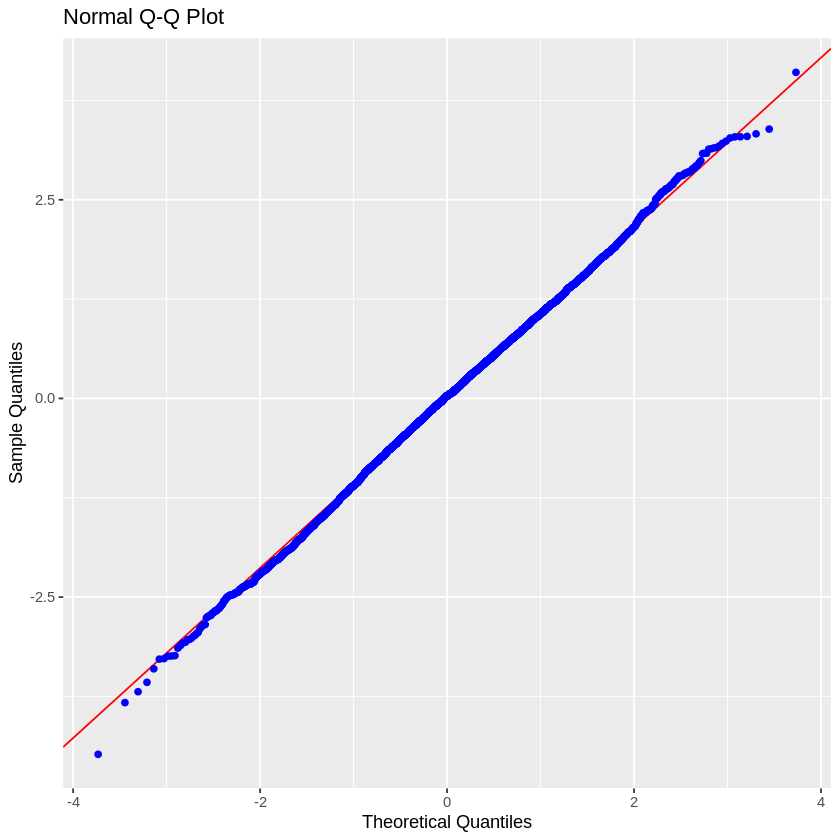

In [74]:
#Graph for detecting violation of normality assumption:
ols_plot_resid_qq(model)

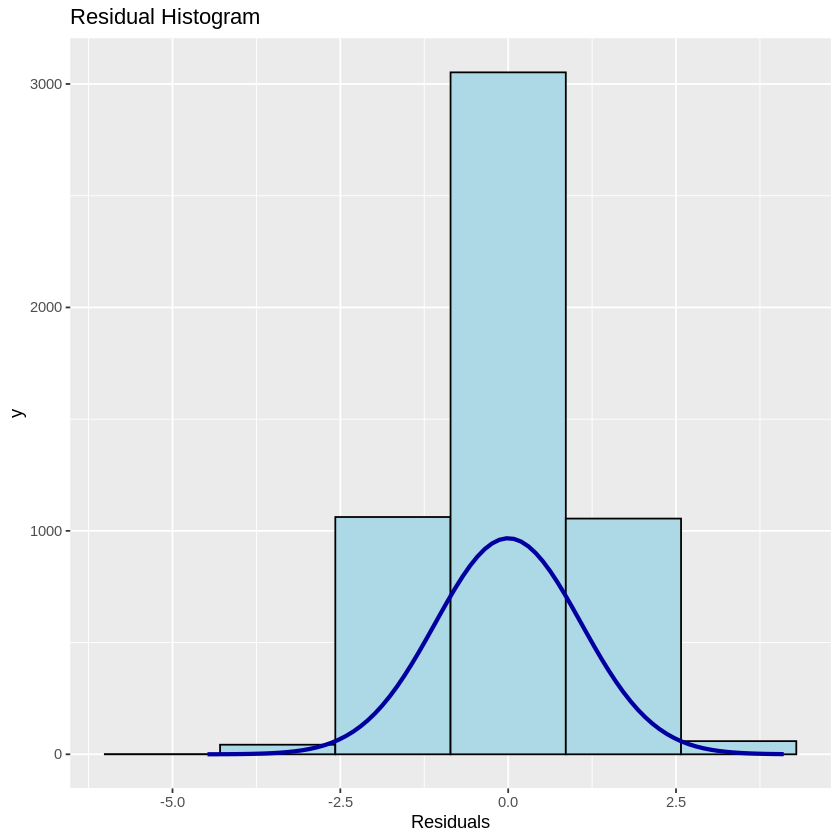

In [75]:
ols_plot_resid_hist(model)

In [76]:
shapiro.test(resid(model)) #Does not work as we have sample more than 5000.

ERROR: Error in shapiro.test(resid(model)): sample size must be between 3 and 5000


In [77]:
# Extract residuals
residuals <- model$residuals

# Perform the Kolmogorov-Smirnov normality test
# We need to standardize the residuals first
standardized_residuals <- (residuals - mean(residuals)) / sd(residuals)

# Perform the K-S test
ks_result <- ks.test(standardized_residuals, "pnorm")

# Print the results
print(ks_result)

Warning message in ks.test.default(standardized_residuals, "pnorm"):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  standardized_residuals
D = 0.014144, p-value = 0.2422
alternative hypothesis: two-sided



In [79]:
install.packages('nortest')
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [80]:
ad.test(residuals)


	Anderson-Darling normality test

data:  residuals
A = 1.302, p-value = 0.002223


### Heteroscedasticity Test

In [ ]:
ols_test_breusch_pagan(model)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

                     Data                       
 -----------------------------------------------
 Response : log(check_in_count) 
 Variables: fitted values of log(check_in_count) 

       Test Summary         
 ---------------------------
 DF            =    1 
 Chi2          =    1.736279 
 Prob > Chi2   =    0.187611 

In [81]:
ols_test_score(model)


 Score Test for Heteroskedasticity
 ---------------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: fitted values of log(check_in_count) 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    1.680567 
 Prob > Chi2   =    0.1948492 

### *Run with Mice

In [ ]:
summary(model) #summary(MiceAllModels$analyses[[2]])


Call:
lm(formula = log(check_in_count) ~ average_stars + nearby_count_minus_1 + 
    attribute_count + restaurantspricerange2 * happyhour + total_population + 
    youth_ratio + adult_ratio, data = MiceCompleteData)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4791 -0.7144  0.0304  0.7293  4.1035 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -2.668e+00  2.621e-01 -10.179  < 2e-16 ***
average_stars                      2.149e-01  1.496e-02  14.366  < 2e-16 ***
nearby_count_minus_1               5.450e-04  4.944e-05  11.023  < 2e-16 ***
attribute_count                    1.397e-01  3.940e-03  35.446  < 2e-16 ***
restaurantspricerange2             3.711e-01  3.602e-02  10.305  < 2e-16 ***
happyhour1                        -9.397e-02  9.150e-02  -1.027  0.30447    
total_population                  -3.687e-06  1.160e-06  -3.178  0.00149 ** 
youth_ratio                        2.631e+00  2.900e-01   

### *Run with pooled_mice

In [ ]:
#build predictive model for all generated imputed data sets
MiceAllModels <- with(MiceImputedData, lm(log(check_in_count) ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2 * happyhour
              + total_population
              + youth_ratio
              + adult_ratio))

In [ ]:
#combine results of all 20 models
pooled_Mice <- pool(MiceAllModels)

**Results**

In [ ]:
pooled_Mice_results <- as.data.frame(summary(pooled_Mice))
pooled_Mice_results

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.650615e+00,2.673543e-01,-9.9142408,3432.4610,7.302775e-23
average_stars,2.181544e-01,1.543366e-02,14.1349792,1980.2763,2.732574e-43
nearby_count_minus_1,5.520490e-04,4.998600e-05,11.0440732,4714.8800,5.150503e-28
attribute_count,1.402159e-01,4.158343e-03,33.7191709,1633.2259,1.268509e-189
restaurantspricerange2,3.710125e-01,3.932480e-02,9.4345679,777.3510,4.427488e-20
happyhour1,-7.912298e-02,1.123559e-01,-0.7042171,157.6793,4.823363e-01
total_population,-3.658027e-06,1.170715e-06,-3.1246088,4712.7473,1.791232e-03
youth_ratio,2.607982e+00,2.931982e-01,8.8949440,4695.0324,8.194842e-19
adult_ratio,3.188617e+00,3.634869e-01,8.7723025,4694.5701,2.410728e-18


In [ ]:
# Adding significance level visualization to the above df:

pooled_Mice_results %>%
    mutate(sign = case_when(p.value >=0 & p.value < 0.001 ~ '***',
                              p.value >=0.001 & p.value < 0.01 ~ '**',
                                p.value >=0.01 & p.value < 0.05 ~ '*',
                                 p.value >=0.05 & p.value < 0.1 ~ '.',
                                  p.value >= 0.1 ~ ' ')
)

term,estimate,std.error,statistic,df,p.value,sign
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-2.650615e+00,2.673543e-01,-9.9142408,3432.4610,7.302775e-23,***
average_stars,2.181544e-01,1.543366e-02,14.1349792,1980.2763,2.732574e-43,***
nearby_count_minus_1,5.520490e-04,4.998600e-05,11.0440732,4714.8800,5.150503e-28,***
attribute_count,1.402159e-01,4.158343e-03,33.7191709,1633.2259,1.268509e-189,***
restaurantspricerange2,3.710125e-01,3.932480e-02,9.4345679,777.3510,4.427488e-20,***
happyhour1,-7.912298e-02,1.123559e-01,-0.7042171,157.6793,4.823363e-01,
total_population,-3.658027e-06,1.170715e-06,-3.1246088,4712.7473,1.791232e-03,**
youth_ratio,2.607982e+00,2.931982e-01,8.8949440,4695.0324,8.194842e-19,***
adult_ratio,3.188617e+00,3.634869e-01,8.7723025,4694.5701,2.410728e-18,***


In [ ]:
#   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# R-square for Pooled Model.

pooled_R_2 <- pool.r.squared(MiceAllModels)
pooled_R_2

,est,lo 95,hi 95,fmi
R^2,0.4469631,0.426743,0.4669052,0.01199444


### *Run with Bootstrap

In [ ]:
fit_b <- Boot(model, R = 5000)

summary(fit_b)
confint(fit_b, level = .95)

,R,original,bootBias,bootSE,bootMed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5000,-2.668207e+00,4.063004e-04,2.547169e-01,-2.665705e+00
average_stars,5000,2.149033e-01,-5.158448e-05,1.461805e-02,2.146538e-01
nearby_count_minus_1,5000,5.450311e-04,7.862923e-08,5.039463e-05,5.457957e-04
attribute_count,5000,1.396699e-01,8.316803e-05,3.841904e-03,1.396865e-01
restaurantspricerange2,5000,3.711416e-01,-4.133090e-04,3.873433e-02,3.702730e-01
happyhour1,5000,-9.397330e-02,-1.341271e-03,8.891224e-02,-9.422830e-02
total_population,5000,-3.686768e-06,1.257948e-08,1.135705e-06,-3.664489e-06
youth_ratio,5000,2.630631e+00,8.306773e-04,2.807305e-01,2.633350e+00
adult_ratio,5000,3.239359e+00,-9.677988e-04,3.462339e-01,3.236187e+00


Warning message in confint.boot(fit_b, level = 0.95):
“BCa method fails for this problem.  Using 'perc' instead”


,2.5 %,97.5 %
(Intercept),-3.173720e+00,-2.154300e+00
average_stars,1.862538e-01,2.442655e-01
nearby_count_minus_1,4.464392e-04,6.443686e-04
attribute_count,1.323167e-01,1.473184e-01
restaurantspricerange2,2.955859e-01,4.475930e-01
happyhour1,-2.686536e-01,8.050150e-02
total_population,-5.936820e-06,-1.481995e-06
youth_ratio,2.093356e+00,3.191542e+00
adult_ratio,2.561238e+00,3.921002e+00
restaurantspricerange2:happyhour1,-1.712684e-01,2.750143e-02


# Extended Model

## Creating a Subset

In [ ]:
#install.packages("mice")

In [ ]:
library(mice)

In [ ]:
# Selecting the variables for analysis:
data_to_analysis_2 <- data %>%
    select(check_in_count, average_stars, nearby_count_minus_1, attribute_count, restaurantspricerange2, happyhour,
                    total_population, total_population_children, total_population_youth, total_population_adults,
                          isromantic, isintimate, istouristy, ishipster, isdivey, isclassy, istrendy, isupscale, iscasual,
                            parking_garage, parking_street, parking_validated, parking_lot, parking_valet, parking_total,
                              alcohol, outdoorseating, restaurantstableservice, bikeparking, byob, businessacceptscreditcards,
                                restaurantscounterservice, hastv, restaurantsreservations, restaurantsdelivery, wifi,
                                  restaurantstakeout, n_photo)

## *Running the Model with NA's (Pre-Mice)

In [ ]:
# Check_in_frequency = β0 + β1 * avg_number_of_stars + β2 * business_proximity + β3 * number of characteristics + β4 * (price_level x happy hour) + ε

In [ ]:
#install.packages("car") #test
library(car)

In [ ]:
model_pre_mice_2 <- lm(check_in_count ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2 * happyhour
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults
              + isromantic
              + isintimate
              + istouristy
              + ishipster
              + isdivey
              + isclassy
              + istrendy
              + isupscale
              + iscasual
              + parking_garage
              + parking_street
              + parking_validated
              + parking_lot
              + parking_valet
              + parking_total
              + alcohol
              + outdoorseating
              + restaurantstableservice
              + bikeparking
              + byob
              + businessacceptscreditcards
              + restaurantscounterservice
              + hastv
              + restaurantsreservations
              + restaurantsdelivery
              + wifi
              + restaurantstakeout
              + n_photo
                                             ,data_to_analysis_2)

In [ ]:
#car::vif(m1) #test
summary(model_pre_mice_2)


Call:
lm(formula = check_in_count ~ average_stars + nearby_count_minus_1 + 
    attribute_count + restaurantspricerange2 * happyhour + total_population + 
    total_population_children + total_population_youth + total_population_adults + 
    isromantic + isintimate + istouristy + ishipster + isdivey + 
    isclassy + istrendy + isupscale + iscasual + parking_garage + 
    parking_street + parking_validated + parking_lot + parking_valet + 
    parking_total + alcohol + outdoorseating + restaurantstableservice + 
    bikeparking + byob + businessacceptscreditcards + restaurantscounterservice + 
    hastv + restaurantsreservations + restaurantsdelivery + wifi + 
    restaurantstakeout + n_photo, data = data_to_analysis_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-315.88  -16.11   -2.95    9.32 1253.68 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -2.472e+00  5.584e+00  -0.443 0.658044    
averag

In [ ]:
# (346 observations deleted due to missingness)

## Pattern of Missings

In [ ]:
args(md.pattern)

function (x, plot = TRUE, rotate.names = FALSE) 
NULL

,check_in_count,average_stars,nearby_count_minus_1,attribute_count,happyhour,isromantic,isintimate,istouristy,ishipster,isdivey,⋯,restaurantsdelivery,wifi,restaurantstakeout,n_photo,total_population,total_population_children,total_population_youth,total_population_adults,restaurantspricerange2,
4926,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
332,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,0,1
12,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,0,0,0,1,4
2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,0,0,0,0,0,5
,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,14,14,14,14,334,390


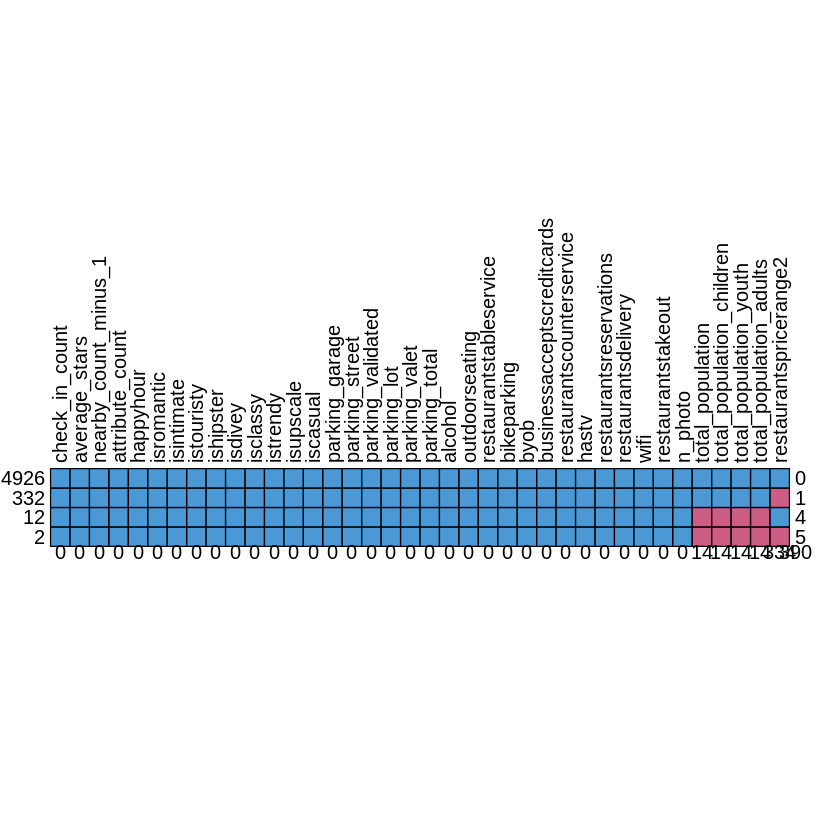

In [ ]:
#inspect pattern of missings
md.pattern(data_to_analysis_2, plot = TRUE, rotate.names = TRUE)

## Impute Data via Mice

In [ ]:
args(mice)

function (data, m = 5, method = NULL, predictorMatrix, ignore = NULL, 
    where = NULL, blocks, visitSequence = NULL, formulas, blots = NULL, 
    post = NULL, defaultMethod = c("pmm", "logreg", "polyreg", 
        "polr"), maxit = 5, printFlag = TRUE, seed = NA, data.init = NULL, 
    ...) 
NULL

In [ ]:
 ## m = num. of imputations
      # Rule of thum = at least as many imputations as percentage of missing vallues
 ## maxit = max num. of iterations

In [ ]:
### Impute Data via mice
MiceImputedData_2 <- mice(data_to_analysis_2, m=20, maxit = 50, seed = 5454, print=FALSE)

In [ ]:
summary(MiceImputedData_2)

## *Running the Model with Mice

### *Run with (x.th out of 20)

In [ ]:
set.seed(123)
sample(1:20, 1)

[1] 15

In [ ]:
#get complete data set (2nd out of 20)
MiceCompleteData_2 <- complete(MiceImputedData_2, 15)

MiceCompleteData_2

In [ ]:
model_after_mice_2 <- lm(check_in_count ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2 * happyhour
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults
              + isromantic
              + isintimate
              + istouristy
              + ishipster
              + isdivey
              + isclassy
              + istrendy
              + isupscale
              + iscasual
              + parking_garage
              + parking_street
              + parking_validated
              + parking_lot
              + parking_valet
              + parking_total
              + alcohol
              + outdoorseating
              + restaurantstableservice
              + bikeparking
              + byob
              + businessacceptscreditcards
              + restaurantscounterservice
              + hastv
              + restaurantsreservations
              + restaurantsdelivery
              + wifi
              + restaurantstakeout
              + n_photo
                                          ,MiceCompleteData_2)

In [ ]:
summary(model_after_mice_2) #summary(MiceAllModels$analyses[[2]])


Call:
lm(formula = check_in_count ~ average_stars + nearby_count_minus_1 + 
    attribute_count + restaurantspricerange2 * happyhour + total_population + 
    total_population_children + total_population_youth + total_population_adults + 
    isromantic + isintimate + istouristy + ishipster + isdivey + 
    isclassy + istrendy + isupscale + iscasual + parking_garage + 
    parking_street + parking_validated + parking_lot + parking_valet + 
    parking_total + alcohol + outdoorseating + restaurantstableservice + 
    bikeparking + byob + businessacceptscreditcards + restaurantscounterservice + 
    hastv + restaurantsreservations + restaurantsdelivery + wifi + 
    restaurantstakeout + n_photo, data = MiceCompleteData_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-314.09  -15.36   -2.82    8.77 1252.98 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -3.904e+00  4.951e+00  -0.788 0.430441    
averag

### *Run with pooled_mice

In [ ]:
#build predictive model for all generated imputed data sets
MiceAllModels_2 <- with(MiceImputedData_2, lm(check_in_count ~
              average_stars
              + nearby_count_minus_1
              + attribute_count
              + restaurantspricerange2 * happyhour
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults
              + isromantic
              + isintimate
              + istouristy
              + ishipster
              + isdivey
              + isclassy
              + istrendy
              + isupscale
              + iscasual
              + parking_garage
              + parking_street
              + parking_validated
              + parking_lot
              + parking_valet
              + parking_total
              + alcohol
              + outdoorseating
              + restaurantstableservice
              + bikeparking
              + byob
              + businessacceptscreditcards
              + restaurantscounterservice
              + hastv
              + restaurantsreservations
              + restaurantsdelivery
              + wifi
              + restaurantstakeout
              + n_photo))

In [ ]:
#combine results of all 20 models
pooled_Mice_2 <- pool(MiceAllModels_2)

**Results**

In [ ]:
pooled_Mice_results_2 <- as.data.frame(summary(pooled_Mice_2))
pooled_Mice_results_2

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.912266581,4.929753e+00,-0.7936029,5206.771,4.274628e-01
average_stars,3.032823316,6.821651e-01,4.4458786,5228.464,8.934514e-06
nearby_count_minus_1,0.014784520,2.381501e-03,6.2080675,5226.860,5.777910e-10
attribute_count,2.276108881,4.312117e-01,5.2784024,5228.464,1.355799e-07
restaurantspricerange2,1.125431657,1.576611e+00,0.7138299,4931.816,4.753662e-01
happyhour1,-1.732958872,6.878046e+00,-0.2519551,4602.584,8.010870e-01
total_population,-0.001266010,6.447571e-04,-1.9635456,5224.316,4.963577e-02
total_population_children,0.001523435,6.829593e-04,2.2306382,5221.100,2.574743e-02
total_population_youth,0.001073836,6.418657e-04,1.6729921,5224.917,9.438872e-02


In [ ]:
# Adding significance level visualization to the above df:

pooled_Mice_results_2 %>%
    mutate(sign = case_when(p.value >=0 & p.value < 0.001 ~ '***',
                              p.value >=0.001 & p.value < 0.01 ~ '**',
                                p.value >=0.01 & p.value < 0.05 ~ '*',
                                 p.value >=0.05 & p.value < 0.1 ~ '.',
                                  p.value >= 0.1 ~ ' ')
)

term,estimate,std.error,statistic,df,p.value,sign
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-3.912266581,4.929753e+00,-0.7936029,5206.771,4.274628e-01,
average_stars,3.032823316,6.821651e-01,4.4458786,5228.464,8.934514e-06,***
nearby_count_minus_1,0.014784520,2.381501e-03,6.2080675,5226.860,5.777910e-10,***
attribute_count,2.276108881,4.312117e-01,5.2784024,5228.464,1.355799e-07,***
restaurantspricerange2,1.125431657,1.576611e+00,0.7138299,4931.816,4.753662e-01,
happyhour1,-1.732958872,6.878046e+00,-0.2519551,4602.584,8.010870e-01,
total_population,-0.001266010,6.447571e-04,-1.9635456,5224.316,4.963577e-02,*
total_population_children,0.001523435,6.829593e-04,2.2306382,5221.100,2.574743e-02,*
total_population_youth,0.001073836,6.418657e-04,1.6729921,5224.917,9.438872e-02,.


In [ ]:
#   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# R-square for Pooled Model.

pooled_R_2_2 <- pool.r.squared(MiceAllModels_2)
pooled_R_2_2

,est,lo 95,hi 95,fmi
R^2,0.4432065,0.4230614,0.4630843,6.663628e-06


#ML Prep.

## Data Prep.

### Binning Check_ins

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


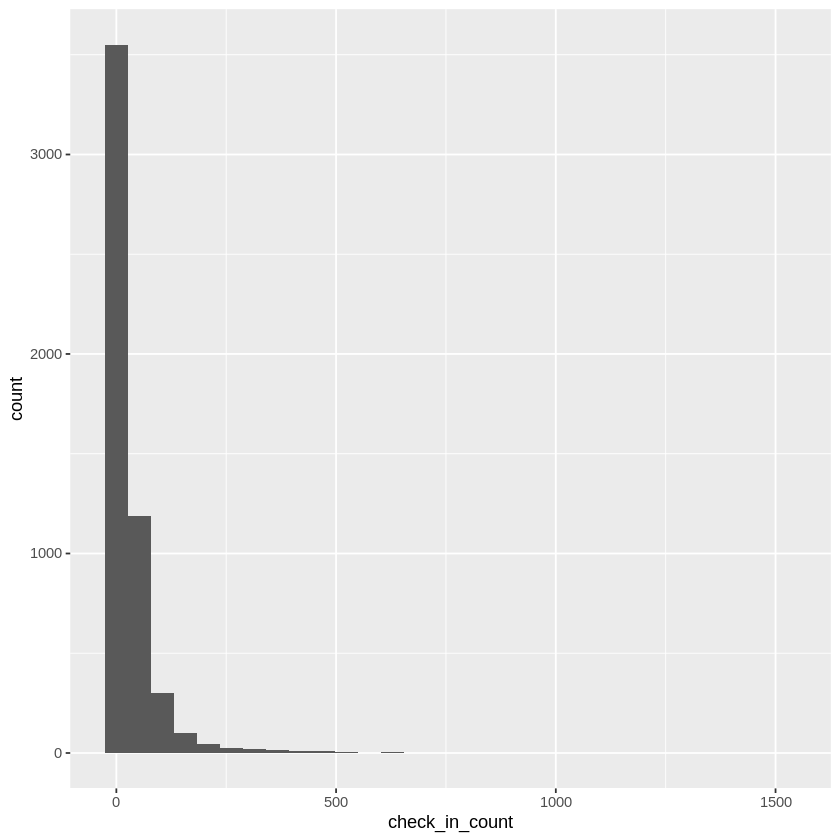

In [ ]:
ggplot(MiceCompleteData_2, aes(check_in_count))+
  geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


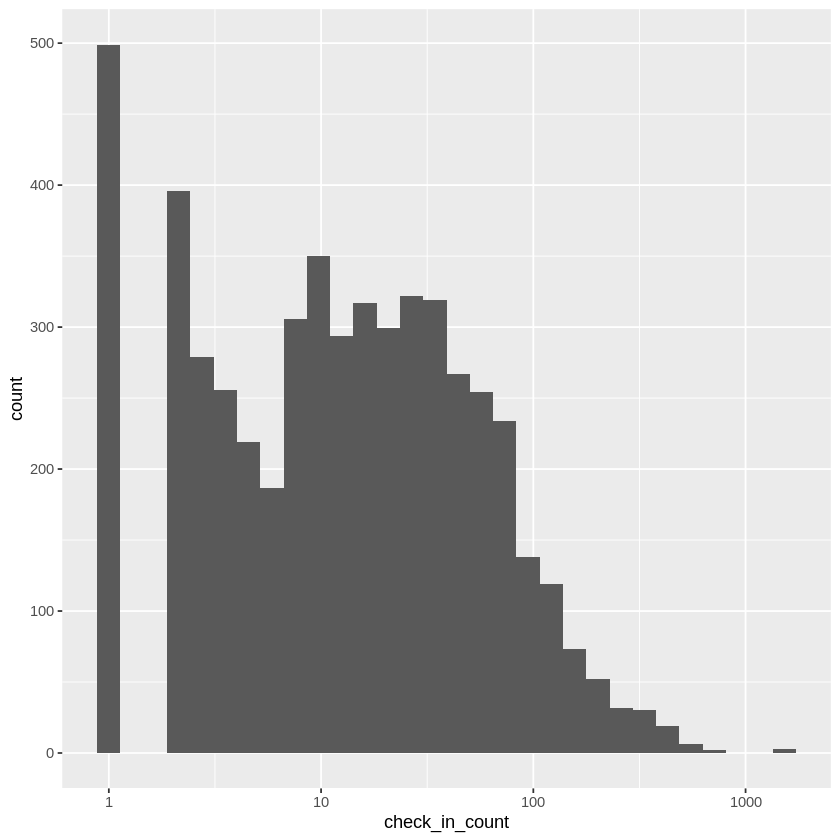

In [ ]:
ggplot(MiceCompleteData_2, aes(check_in_count))+
  geom_histogram()+
  scale_x_log10()

In [ ]:
#Adding log10(check_in_count_pre_2020) to the df:

data_mice_bin_calc1 <- MiceCompleteData_2 %>%
  mutate(check_in_count_LOG = log10(check_in_count))

In [ ]:
#Determine the range:
min_log <- min(data_mice_bin_calc1$check_in_count_LOG, na.rm = TRUE)
max_log <- max(data_mice_bin_calc1$check_in_count_LOG, na.rm = TRUE)

min_log
max_log

[1] 0

[1] 3.182415

In [ ]:
# Number of bins:
number_of_bins <- 2

# Creating the bin edges:
breaks <- seq(min_log, max_log, length.out = number_of_bins + 1)

In [ ]:
# Calculating bins, and adding into df:

data_mice_bin_calc2 <- data_mice_bin_calc1 %>%
  mutate(check_in_bin = cut(data_mice_bin_calc1$check_in_count_LOG, breaks = breaks, labels = FALSE, include.lowest = TRUE))

In [ ]:
head(data_mice_bin_calc2)

,check_in_count,average_stars,nearby_count_minus_1,attribute_count,restaurantspricerange2,happyhour,total_population,total_population_children,total_population_youth,total_population_adults,⋯,businessacceptscreditcards,restaurantscounterservice,hastv,restaurantsreservations,restaurantsdelivery,wifi,restaurantstakeout,n_photo,check_in_count_LOG,check_in_bin
,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>
1,2,2.0000,163,9,1,0,41271,8924,6658,20247,⋯,0,0,1,0,1,No,1,0,0.3010300,1
2,2,0.0000,163,9,1,0,41271,8924,6658,20247,⋯,0,0,1,0,1,No,1,0,0.3010300,1
3,8,4.7500,11,8,1,0,35239,4124,5312,20997,⋯,0,0,0,0,0,No,1,5,0.9030900,1
4,6,4.9286,11,8,1,0,35239,4124,5312,20997,⋯,0,0,0,0,0,No,1,5,0.7781513,1
5,5,2.2000,45,8,2,0,9808,1402,1373,5324,⋯,1,0,1,1,0,Free,1,0,0.6989700,1
6,4,2.6000,45,8,2,0,9808,1402,1373,5324,⋯,1,0,1,1,0,Free,1,0,0.6020600,1


In [ ]:
table(data_mice_bin_calc2$check_in_bin)


   1    2 
4043 1229 

In [ ]:
# Renaming bins as Dummy, and adding corresponding string:

data_mice_bin_calc2$check_in_bin <- as.character(data_mice_bin_calc2$check_in_bin) #Required to be able to use recode()

data_mice_bin_calc3 <- data_mice_bin_calc2 %>%
  mutate(ch_in = recode(check_in_bin,


                               "2" = "1",
                               "1" = "0"),
        ch_in_string = recode(check_in_bin,


                               "2" = "High_Range",
                               "1" = "Low_Range")
                               )

data_mice_bin_calc3$ch_in <- as.integer(data_mice_bin_calc3$ch_in)

data_mice_bin_calc3$ch_in_string <- as.factor(data_mice_bin_calc3$ch_in_string)

In [ ]:
data_mice_bin_calc3$ch_in_string <- relevel(data_mice_bin_calc3$ch_in_string,ref="Low_Range")

In [ ]:
head(data_mice_bin_calc3)

,check_in_count,average_stars,nearby_count_minus_1,attribute_count,restaurantspricerange2,happyhour,total_population,total_population_children,total_population_youth,total_population_adults,⋯,hastv,restaurantsreservations,restaurantsdelivery,wifi,restaurantstakeout,n_photo,check_in_count_LOG,check_in_bin,ch_in,ch_in_string
,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<chr>,<int>,<fct>
1,2,2.0000,163,9,1,0,41271,8924,6658,20247,⋯,1,0,1,No,1,0,0.3010300,1,0,Low_Range
2,2,0.0000,163,9,1,0,41271,8924,6658,20247,⋯,1,0,1,No,1,0,0.3010300,1,0,Low_Range
3,8,4.7500,11,8,1,0,35239,4124,5312,20997,⋯,0,0,0,No,1,5,0.9030900,1,0,Low_Range
4,6,4.9286,11,8,1,0,35239,4124,5312,20997,⋯,0,0,0,No,1,5,0.7781513,1,0,Low_Range
5,5,2.2000,45,8,2,0,9808,1402,1373,5324,⋯,1,1,0,Free,1,0,0.6989700,1,0,Low_Range
6,4,2.6000,45,8,2,0,9808,1402,1373,5324,⋯,1,1,0,Free,1,0,0.6020600,1,0,Low_Range


In [ ]:
#Rename Dataset:

data_mice_bin <- data_mice_bin_calc3

In [ ]:
table(data_mice_bin$ch_in_string)


 Low_Range High_Range 
      4043       1229 

Visualization

In [ ]:
quartiles <- data_mice_bin_calc3 %>%
  summarize(upper = quantile(check_in_count_LOG, 0.667))

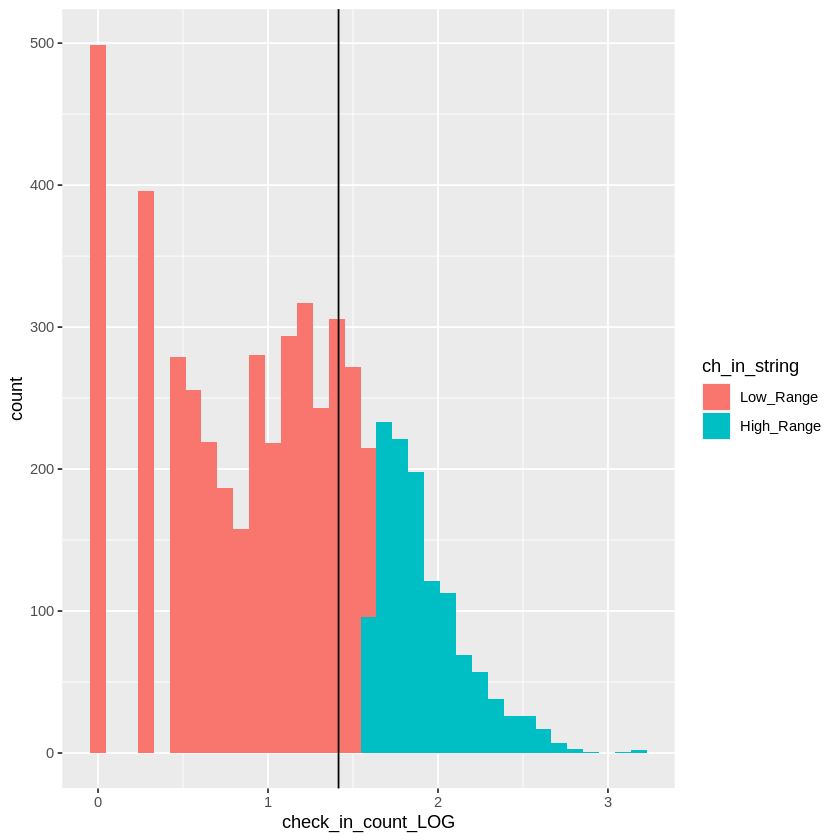

In [ ]:
#Visualization with Top 33.3%:

ggplot(data_mice_bin_calc3, aes(check_in_count_LOG, fill = ch_in_string))+
  geom_histogram(bins=35)+
  geom_vline(data = quartiles, aes(xintercept = upper))

### Splitting Data into Test + Evaluation Data

In [ ]:
head(data_mice_bin)

In [ ]:
varsin=c("ch_in_string", "ch_in",
            "average_stars", "nearby_count_minus_1", "attribute_count", "restaurantspricerange2", "happyhour",
              "total_population", "total_population_children", "total_population_youth", "total_population_adults",
              "isromantic", "isintimate", "istouristy", "ishipster", "isdivey", "isclassy", "istrendy", "isupscale", "iscasual",
                            "parking_garage", "parking_street", "parking_validated", "parking_lot", "parking_valet", "parking_total",
                              "alcohol", "outdoorseating", "restaurantstableservice", "bikeparking", "byob", "businessacceptscreditcards",
                                "restaurantscounterservice", "hastv", "restaurantsreservations", "restaurantsdelivery", "wifi",
                                  "restaurantstakeout", "n_photo")
data_mice_bin=subset(data_mice_bin,select=varsin)

In [ ]:
datasetsize <- nrow(data_mice_bin)

In [ ]:
set.seed(9876)

x <- data_mice_bin[sample(1:nrow(data_mice_bin), datasetsize, replace = F),]
x.train <- x[1:floor(nrow(x)*.75), ]
x.evaluate <- x[(floor(nrow(x)*.75)+1):nrow(x), ]

In [ ]:
table(x.train$ch_in_string)


 Low_Range High_Range 
      3025        929 

### Class Imbalance

#### SMOTE for Minority Class

In [ ]:
#install.packages("caret")

In [ ]:
library(caret)

In [ ]:
BaseFormula <- as.formula(paste0("ch_in_string~",paste(varsin[-c(1,2)],collapse = "+")))
BaseFormula1 <- as.formula(paste0("ch_in~",paste(varsin[-c(1,2)],collapse = "+")))


# create dummies (required for SMOTE)
x.traindum=cbind(x.train[,c("ch_in","ch_in_string")],predict(dummyVars(BaseFormula1,data=x.train),newdata = x.train))
x.evaluatedum=cbind(x.evaluate[,c("ch_in","ch_in_string")],predict(dummyVars(BaseFormula1,data=x.evaluate),newdata = x.evaluate))

In [ ]:
#Control:

str(x.traindum)

In [ ]:
# args(SMOTE):

# X = A data frame or matrix of numeric-attributed dataset.
# target = A vector of a target class attribute corresponding to a dataset X.
# K = The number of nearest neighbors during sampling process.
# dup_size = The number or vector representing the desired times of synthetic minority instances over the original number of majority instances.

In [ ]:
# SMOTE:
set.seed(3321)
x.traindum_smote <- SMOTE(x.traindum[,-c(1,2)],x.traindum[,2])$data

table(x.traindum_smote$class)


High_Range  Low_Range 
      2787       3025 

In [ ]:
#Adding class factors as dummy + renaming columns:

x.traindum_smote <- x.traindum_smote %>%
                    mutate(ch_in = recode(class,


                               "High_Range" = "1",
                               "Low_Range" = "0")
                               ) %>%
                                    rename(ch_in_string = class)

x.traindum_smote$ch_in_string <- as.factor(x.traindum_smote$ch_in_string)
x.traindum_smote$ch_in <- as.integer(x.traindum_smote$ch_in)

In [ ]:
x.traindum_smote$ch_in_string <- relevel(x.traindum_smote$ch_in_string,ref="Low_Range")

In [ ]:
table(x.traindum_smote$ch_in_string)


 Low_Range High_Range 
      3025       2787 

In [ ]:
#Assign news train data to its original name:
x.traindum <- x.traindum_smote

## Data for Heuristic Machine Learning Methods

### Normalization

In [ ]:
# normalize data (very important for ML techniques, but not for logistic regression)
x.trainnorm=predict(preProcess(x.traindum, method = "range"), newdata=x.traindum)
x.evaluatenorm=predict(preProcess(x.evaluatedum, method = "range"), newdata=x.evaluatedum)

### Adjust Baseformula to the Dummy Version of the Data

In [ ]:
varsin_dum = varsin[1:2]
for(i in 3:length(varsin)){
  if(!is.null(levels(x[,varsin[i]]))){
    for(j in 2:nlevels(x[,varsin[i]])){ # first level will be considered as the base-level
      varsin_dum = c(varsin_dum, paste(varsin[i], levels(x[,varsin[i]])[j], sep = "."))
    }
  } else {
    varsin_dum = c(varsin_dum, varsin[i])
  }
}

### Redo the Releveling

In [ ]:
# Redo the releveling:
x.traindum$ch_in_string=relevel(x.traindum$ch_in_string,ref="Low_Range")
x.evaluatedum$ch_in_string=relevel(x.evaluatedum$ch_in_string,ref="Low_Range")
x.trainnorm$ch_in_string=relevel(x.trainnorm$ch_in_string,ref="Low_Range")
x.evaluatenorm$ch_in_string=relevel(x.evaluatenorm$ch_in_string,ref="Low_Range")

In [ ]:
BaseFormula_dum <- as.formula(paste0("ch_in_string~",paste(varsin_dum[-c(1,2)],collapse = "+")))
BaseFormula1_dum <- as.formula(paste0("ch_in~",paste(varsin_dum[-c(1,2)],collapse = "+")))

### Set Threshold Probability

In [ ]:
# set threshold probability: usually .5, but better is to set it to the portion of 1's.
probthres=mean(x.traindum$ch_in)

### makeLiftPlot

In [ ]:
makeLiftPlot <- function(Prediction, Evaluate, ModelName){
  # plots the liftplot, and computes the GINI coefficient.
  iPredictionsSorted <- sort(Prediction,index.return=T,decreasing=T)[2]$ix #extract the index order according to predicted retention
  CustomersSorted <- Evaluate$ch_in_string[iPredictionsSorted] #sort the true behavior of customers according to predictions
  SumChurnReal<- sum(Evaluate$ch_in_string == "High_Range") #total number of real churners in the evaluation set
  CustomerCumulative=seq(nrow(Evaluate))/nrow(Evaluate) #cumulative fraction of customers
  ChurnCumulative=apply(matrix(CustomersSorted=="High_Range"),2,cumsum)/SumChurnReal #cumulative fraction of churners
  ProbTD = sum(CustomersSorted[1:floor(nrow(Evaluate)*.1)]=="High_Range")/floor(nrow(Evaluate)*.1) #probability of churn in 1st decile
  ProbOverall = SumChurnReal / nrow(Evaluate) #overall churn probability
  TDL = ProbTD / ProbOverall
  GINI = sum((ChurnCumulative-CustomerCumulative)/(t(matrix(1,1,nrow(Evaluate))-CustomerCumulative)),na.rm=T)/nrow(Evaluate)
  plot(CustomerCumulative,ChurnCumulative,type="l",main=paste("Lift curve of", ModelName),xlab="Cumulative fraction of check-ins (sorted by predicted check-in probability)",ylab="Cumulative fraction of check-ins")
  lines(c(0,1),c(0,1),col="blue",type="l",pch=22, lty=2)
  legend(.66,.2,c("According to model","Random selection"),cex=0.8,  col=c("black","blue"), lty=1:2)
  text(0.15,1,paste("TDL = ",round(TDL,2), "; GINI = ", round(GINI,2) ))
  return(data.frame(TDL,GINI))
}

# ML Application

## LOGIT

In [ ]:
ptm <- proc.time()
x.modelLogit <- glm(BaseFormula_dum , data = x.traindum, family = "binomial") # estimating the probability of having an "Above Average" restourant.

summary(x.modelLogit)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = BaseFormula_dum, family = "binomial", data = x.traindum)

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -5.154e+00  3.835e-01 -13.440  < 2e-16 ***
average_stars                 4.333e-01  5.892e-02   7.353 1.93e-13 ***
nearby_count_minus_1          7.709e-04  1.294e-04   5.957 2.57e-09 ***
attribute_count               1.487e-01  2.483e-02   5.989 2.11e-09 ***
restaurantspricerange2        3.789e-01  9.349e-02   4.053 5.05e-05 ***
happyhour.1                  -1.891e-01  1.260e-01  -1.500 0.133603    
total_population             -1.362e-04  4.043e-05  -3.368 0.000758 ***
total_population_children     4.304e-05  4.614e-05   0.933 0.350915    
total_population_youth        1.309e-04  4.028e-05   3.249 0.001157 ** 
total_population_adults       1.776e-04  5.115e-05   3.472 0.000516 ***
isromantic.1                 -1.521e+00  3.349e-01  -4.542 5.57e-06 ***
isintimate.1                 -9.930e-01  2.

In [ ]:
x.evaluate$predictionlogit <- predict(x.modelLogit, newdata=x.evaluatedum, type = "response")
x.evaluate$predictionlogitclass[x.evaluate$predictionlogit>probthres] <- "High_Range"
x.evaluate$predictionlogitclass[x.evaluate$predictionlogit<=probthres] <- "Low_Range"

In [ ]:
x.evaluate$correctlogit <- x.evaluate$predictionlogitclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctlogit)))

[1] "% of predicted classifications correct 0.824734446130501"


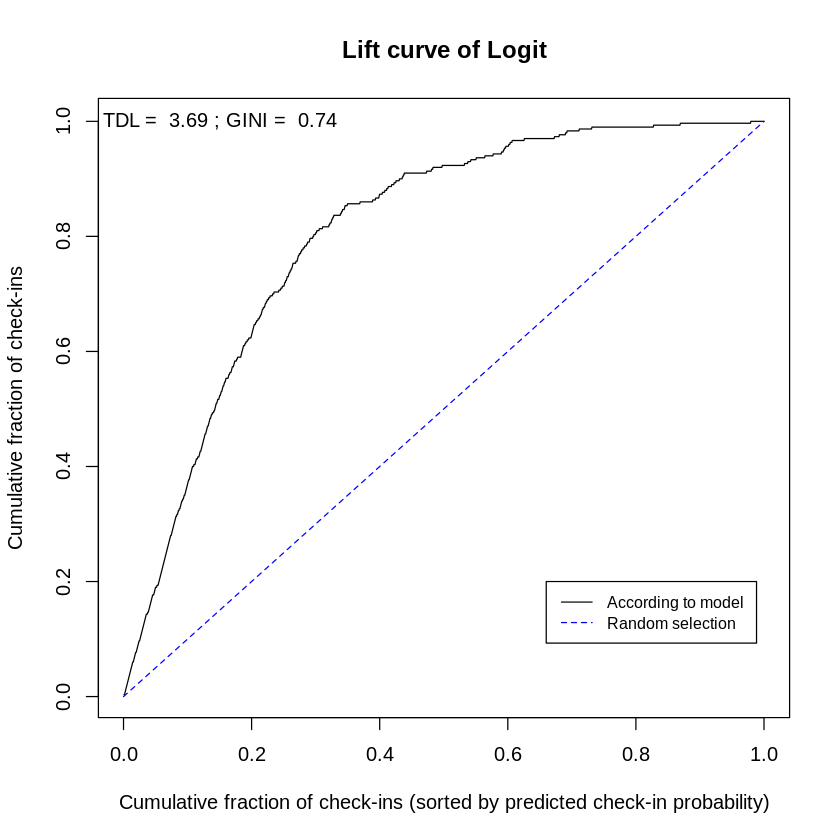

In [ ]:
LogitOutput <- makeLiftPlot(x.evaluate$predictionlogit,x.evaluate,"Logit")

In [ ]:
TimeAux <- proc.time() - ptm
#LogitOutput$summary=summary(x.modelLogit)
LogitOutput$TimeElapsed <- TimeAux[3]
LogitOutput$PercCorrect <- mean(x.evaluate$correctlogit)*100
Logitconfmatrix <- table(x.evaluate$predictionlogitclass,x.evaluate$ch_in_string)
rm(TimeAux)

In [ ]:
LogitOutput$TimeElapsed

[1] 56.02

In [ ]:
LogitOutput$PercCorrect

[1] 82.47344

In [ ]:
Logitconfmatrix

            
             Low_Range High_Range
  High_Range       177        246
  Low_Range        841         54

## Naive Bayes

In [ ]:
x.modelNB <- train(BaseFormula_dum, data = x.trainnorm, method="naive_bayes")

x.evaluate$predictionNB <- predict(x.modelNB, newdata=x.evaluatenorm,type="prob")

x.evaluate$predictionNBclass[x.evaluate$predictionNB[,'High_Range']>probthres]="High_Range"
x.evaluate$predictionNBclass[x.evaluate$predictionNB[,'High_Range']<=probthres]="Low_Range"

[1] "% of predicted classifications correct 0.810318664643399"
ROC curve variable importance

  only 20 most important variables shown (out of 39)

                          Importance
n_photo                       100.00
attribute_count                74.65
nearby_count_minus_1           56.71
isclassy.1                     54.00
alcohol.Full_bar               49.29
total_population_children      48.07
restaurantspricerange2         46.06
happyhour.1                    44.15
restaurantstableservice.1      43.54
outdoorseating.1               38.40
istrendy.1                     37.85
parking_street.1               37.63
total_population               36.99
iscasual.1                     34.79
restaurantsreservations.1      34.27
total_population_youth         32.94
total_population_adults        32.29
average_stars                  28.14
parking_total.1                25.55
bikeparking.1                  22.68


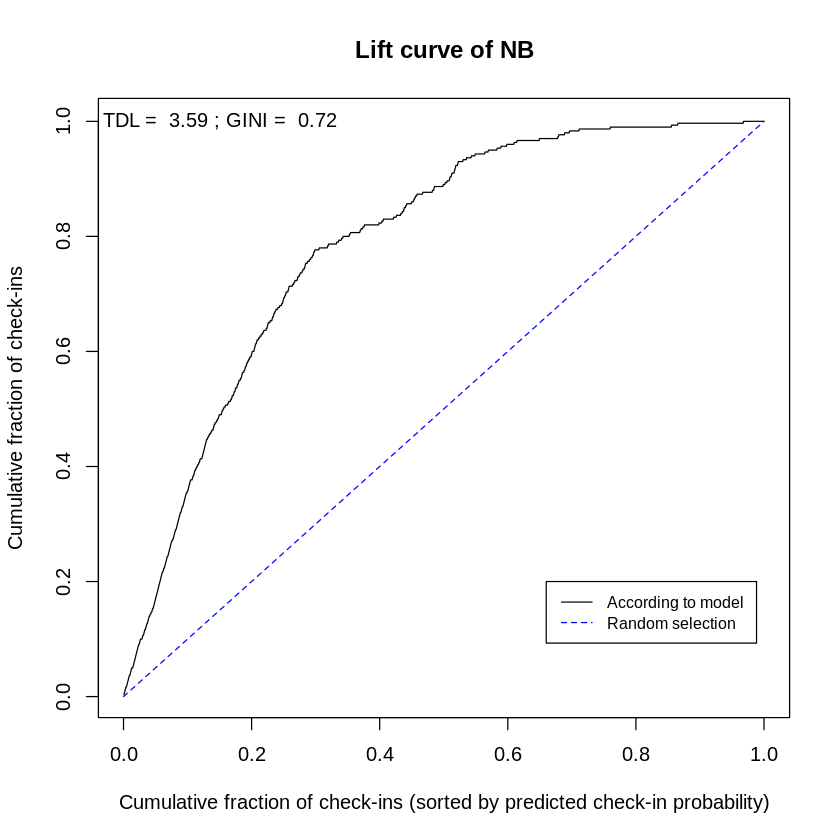

In [ ]:
x.evaluate$correctNB <- x.evaluate$predictionNBclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctNB)))

# the variable importance
print(varImp(x.modelNB))

# Extract the class probabilities.
x.evaluate$predictionNB <- x.evaluate$predictionNB[,'High_Range']

NBOutput <- makeLiftPlot(x.evaluate$predictionNB,x.evaluate,"NB")

TimeAux <- proc.time() - ptm
NBOutput$TimeElapsed <- TimeAux[3]
NBOutput$PercCorrect <- mean(x.evaluate$correctNB)*100
NBconfmatrix <- table(x.evaluate$predictionNBclass,x.evaluate$ch_in_string)

In [ ]:
NBOutput$PercCorrect

[1] 81.03187

In [ ]:
NBconfmatrix

            
             Low_Range High_Range
  High_Range       184        234
  Low_Range        834         66

## KNN

[1] "% of predicted classifications correct 0.776176024279211"
ROC curve variable importance

  only 20 most important variables shown (out of 39)

                          Importance
n_photo                       100.00
attribute_count                74.65
nearby_count_minus_1           56.71
isclassy.1                     54.00
alcohol.Full_bar               49.29
total_population_children      48.07
restaurantspricerange2         46.06
happyhour.1                    44.15
restaurantstableservice.1      43.54
outdoorseating.1               38.40
istrendy.1                     37.85
parking_street.1               37.63
total_population               36.99
iscasual.1                     34.79
restaurantsreservations.1      34.27
total_population_youth         32.94
total_population_adults        32.29
average_stars                  28.14
parking_total.1                25.55
bikeparking.1                  22.68


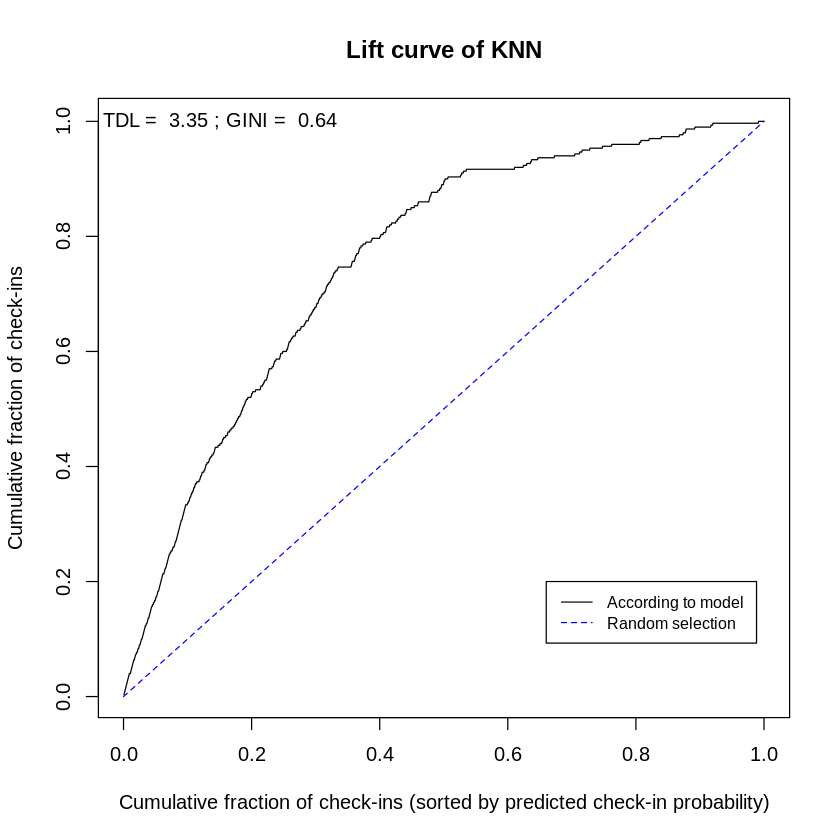

In [ ]:
x.modelKNN <- train(BaseFormula_dum, data = x.trainnorm, method="knn")

x.evaluate$predictionKNN <- predict(x.modelKNN, newdata=x.evaluatenorm,type="prob")


x.evaluate$predictionKNNclass[x.evaluate$predictionKNN[,'High_Range']>probthres]="High_Range"
x.evaluate$predictionKNNclass[x.evaluate$predictionKNN[,'High_Range']<=probthres]="Low_Range"

x.evaluate$correctKNN <- x.evaluate$predictionKNNclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctKNN)))

# the variable importance
print(varImp(x.modelKNN))

# Extract the class probabilities.
x.evaluate$predictionKNN <- x.evaluate$predictionKNN[,'High_Range']

KNNOutput <- makeLiftPlot(x.evaluate$predictionKNN,x.evaluate,"KNN")

TimeAux <- proc.time() - ptm
KNNOutput$TimeElapsed <- TimeAux[3]
KNNOutput$PercCorrect <- mean(x.evaluate$correctKNN)*100
KNNconfmatrix <- table(x.evaluate$predictionKNNclass,x.evaluate$ch_in_string)
rm(TimeAux)

## SVM

In [ ]:
############ SVM

ptm <- proc.time()
# fast trainer
x.modelSVM <- train(BaseFormula_dum, data = x.trainnorm, method="svmRadial", cachesize=12000, tolerance=.01,
                    trControl = trainControl(classProbs =  TRUE))

x.evaluate$predictionSVM <- predict(x.modelSVM, newdata=x.evaluatenorm, type="prob")


x.evaluate$predictionSVMclass[x.evaluate$predictionSVM[,'High_Range']>probthres]="High_Range"
x.evaluate$predictionSVMclass[x.evaluate$predictionSVM[,'High_Range']<=probthres]="Low_Range"

x.evaluate$correctSVM <- x.evaluate$predictionSVMclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctSVM)))

# for fast trainer you can also get the variable importance
print(varImp(x.modelSVM))

# Extract the class probabilities.
x.evaluate$predictionSVM <- x.evaluate$predictionSVM[,'High_Range']

SVMOutput <- makeLiftPlot(x.evaluate$predictionSVM,x.evaluate,"SVM")

TimeAux <- proc.time() - ptm
SVMOutput$TimeElapsed <- TimeAux[3]
SVMOutput$PercCorrect <- mean(x.evaluate$correctSVM)*100
SVMconfmatrix <- table(x.evaluate$predictionSVMclass,x.evaluate$ch_in_string)
rm(TimeAux)

line search fails -2.505747 0.0001759928 1.106888e-05 5.708378e-07 -4.342934e-08 -4.014229e-09 -4.830058e-13

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class prediction calculations failed; returning NAs”
Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
“kernlab class probability calculations failed; returning NAs”
Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


## Neural Network

In [ ]:
install.packages("NeuralNetTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(NeuralNetTools)

In [ ]:
install.packages("RSNNS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(RSNNS)

Loading required package: Rcpp


Attaching package: ‘RSNNS’


The following objects are masked from ‘package:caret’:

    confusionMatrix, train




In [ ]:
########## Neural network
# fast trainer using parallel computations
ptm <- proc.time()
mlp_grid = expand.grid(layer1 = 5,
                       layer2 = 0,
                       layer3 = 0)

x.modelNNet <- train(BaseFormula_dum, data=x.trainnorm, method="mlpML",tuneGrid=mlp_grid)

x.evaluate$predictionNNet <- predict(x.modelNNet, newdata = x.evaluatenorm, type="prob")

x.evaluate$predictionNNetclass[x.evaluate$predictionNNet[,"Above_Average"]>probthres]="Above_Average"
x.evaluate$predictionNNetclass[x.evaluate$predictionNNet[,"Above_Average"]<=probthres]="Below_Average"


x.evaluate$correctNNet <- x.evaluate$predictionNNetclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctNNet)))

print(varImp(x.modelNNet))
# plot NNet
if(0){
  NeuralNetTools::plotnet(x.modelNNet$finalModel)
}
x.evaluate$predictionNNet <- x.evaluate$predictionNNet[,"Above_Average"]

NNetOutput <- makeLiftPlot(x.evaluate$predictionNNet,x.evaluate,"Neural Network")

TimeAux <- proc.time() - ptm
#NNetOutput$summary=varImp(x.modelNNet)
NNetOutput$TimeElapsed <- TimeAux[3]
NNetOutput$PercCorrect <- mean(x.evaluate$correctNNet)*100
NNetconfmatrix <- table(x.evaluate$predictionNNetclass,x.evaluate$ch_in_string)
rm(TimeAux)

ERROR: Error in UseMethod("train"): no applicable method for 'train' applied to an object of class "formula"
